# Let's cover some more basics 

## What is Regression?

- Regression belongs to the category of supervised learning where we model the relationship between the feature space and a continuous target variable (aka the response vector).
- The goal of regression algorithms is to uncover a perfect relationship $f(X)=y$
- However, in reality data is noisy... therefore $f(X)= y +\epsilon$
- In Regression we use some computational method to train a model $\hat f(X) \approx f(X)$:
  - Which means we try to find a mapping function $f$
  - Based on some input dataset $X$
  - To create continuous output value $y$
  - That is close as possible to the hypothetical model $f(X)$

## Most common terminologies 

### Outliers: 
- Outliers are basically values or data points that are very stray from the general population or distribution of data. 
- Outliers have the ability to skew the results of any ML model towards their detection. 
- Therefore, it is necessary to detect them early on or use algorithms resistant to outliers.

### Model complexity 
- A model can be complex because it has many parameters/rules or many features or both 
- Our goal is to find a model that maximises some performance measure while minimizing complexity 

### Why do we want to minimizing complexity? 
- The more complex the model is the less interpretable it is and as a result the less insights we can derive from it 
- In general we wish to find a model that generalises well to unseen data 
- To achieve that we often rely on data-driven methods to reduce the chance of either overfitting or underfitting 
- This is reoffered to as hyperparameter tuning (in order to select the best parameters across our pipeline)
- And feature selection or elimination to reduce the complexity of the model 

### Overfitting: 
- Overfitting is the process of learning a bespoke model that solves the approximation problem extremely well for the training data but it has poor generalizability

### Underfitting: 
- Overfitting is the process of learning a bespoke model that solves the approximation problem extremely well for the training data but it has poor generalizability

### Heteroscedasticity and homoscedasticity
- This simply means the uniformity or heterogeneity of the variance around the regression line 


## Models associated with regression analysis

- We can roughly separate any supervised model to two major classes 
  - Parametric models
    -  A parametric model is a learner that summarizes data through a fixed collection of parameters.
  - Non-Parametric models
    - A non-parametric model is a learner where the number of parameters grows with the size of the training set.
- We can also separate models based on the type of association  
  - Linear or Non-linear    
- Or type of output 
  - Single output 
  - Multiple output 
  



## How do we assess regression performance? 

### Performance measures in regression 
- Recall that in regression our task is to predict a continuous value (the depndent variable)
based a set of independent variables that we assume hold some informative association to the target.
- The various metrics we will use to evaluate regression results are  
    - Mean Absolute Error (MAE)    
    - Mean Squared Error(MSE) 
    - Root-Mean-Squared-Error(RMSE) 
    - Median absolute error (MAD)  
    - Coefficient of determination $R^2$ score 


#### Mean Absolute Error (MAE)  
- MAE is the absolute difference between the target and predicted values.
- It is more robust to outliers compared to MSE. 
- MAE is a linear score which means all the individual differences are weighted equally.
- One benefit of MAE is that it is simple to interpret as no transformation are done to the data.

$\text{MAE} = 1/n \sum^n_{i=1} |y_i-\hat y_i|$ 


#### Mean Squared Error (MSE) 
- MSE is one the most common metric for fitting regression models.
- It is simply the average of the squared difference between the target predicted values. 
- Squaring the differences means the metric is sensitive even to small errors
- This leads to over-estimation of error.

$\text{MSE} = 1/n \sum^n_{i=1} (y_i-\hat y_i)^2$

#### Root Mean Squared Error (RMSE)
- RMSE is the most widely used metric for regression tasks
- It is the square root of the MSE.
- However, the errors are first squared and then avereged
- This poses a high penalty on large errors. 
- And suggests that RMSE is most useful when large errors are undesired.    

$ \text{RMSE} = \sqrt{\frac{\sum^n_{i=1} (y_i-\hat y_i)^2}{n}}$

#### Median absolute error (MAD)
- A robust measure of the variability of a univariate sample of quantitative data. 
- It is a more resilient error measure to outliers in a data set than the standard deviation.
- It is easy to communicate 

$\text{MAD}(y, \hat{y}) = \text{median}(\mid y_1 - \hat{y}_1 \mid, \ldots, \mid y_n - \hat{y}_n \mid).$

#### Coefficient of determination $R^2$ Error
- $R^2$ is another metric used for evaluating the performance of a regression model
- The $R^2$ metric is used to compare a regression model with some constant baseline (usually the mean)
- The larger the difference, between the model and the baseline the greater the value (and the better the model)
- $R^2$ range is $(-\infty,1)$; as a result, worse models then the mean constant will be negative 

$ R^2 = 1-\frac{MSE(model)}{MSE(baseline)}$


### We can define a function to calculate all of these in one go 
- Given some ground truth y and some approximation y_hat we want a function that will report all the different performance metrics of interest

In [1]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,median_absolute_error
def calc_error(y,y_hat,i=None,kind='model'):
    err = {'Kind':kind,
            'MAE':mean_absolute_error(y,y_hat),
            'MSE':mean_squared_error(y,y_hat),
            'MAD':median_absolute_error(y,y_hat),
            'RMSE':mean_squared_error(y,y_hat,squared=False), # If True returns MSE value, if False returns RMSE value.
            'r2':r2_score(y,y_hat)}
    return pd.DataFrame(err,index=[i])


## Introduction to Linear Regression in Python

- Linear regression is one of the most basic predictive models it uses features data to estimate a response variable. 
- It is considered the first step in any predictive modelling effort 
- The basic idea is that we can find some weighted association between the features and output. 



# Start with a simple problem

- let's start with a linear problem with one feature and one response vector $ y = 0.5x+\epsilon $
- We will use a linear model to fit a line onto the toy observation
- Recall from your statistics courses over the year the simple linear model $ Y=a+\beta X+\epsilon$
- What we have here is a robust predictive framework 
    - Let's refresh your memory with the intuition behind this formula  
    - a is called the intercept, and it merely means some constant baseline to shift the parametric space 
    - $\beta$ is the weight we are multiplying X with to match Y as best as possible 
    - finally $\epsilon$ is the deviation or error between the product of the 
    function and actual value of Y we are trying to predict  
- The stronger the association between y (the continuous response vector) and X 
the easier it is to fit a line (with only two parameters) that will minimise the error 





In [2]:
import numpy as np
rng = np.random.default_rng(2022)
fu = lambda x,noise: 0.5 * x + noise * rng.uniform(0,1,size=x.shape)

N = 100
x = rng.normal(10,5,size=(N,))
x_range = np.linspace(0,20,100)
y = fu(x,0) # ground truth 

In [3]:
import matplotlib.pyplot as plt
perf = [] 
fig, ax = plt.subplots(1, 5,sharey=True,sharex=True,figsize=(20,5))
for i,sd in enumerate(np.arange(1,10,2)):
    y_hat = fu(x,sd)
    ax[i].scatter(x, y_hat, s=20,c='gray',alpha=0.5)
    ax[i].plot(x_range,np.polyval([0.5,0], x_range) ,c='g',label='Ground truth');
    coefs = np.polyfit(x, y_hat, 1)
    ax[i].plot(x_range,np.polyval(coefs, x_range) ,c='b',label='linear model');

    ax[i].set_title(f'$y = {coefs[-1]:0.2f}+{coefs[0]:0.2f}*x +\epsilon$')
    if i==0:ax[i].legend()
    perf.append(calc_error(y,y_hat,i,f'err={sd}'))
pd.concat(perf)    
    

ModuleNotFoundError: No module named 'matplotlib'

# Compare this to a tree model 
- The Decision Tree Classifier predicts the regressed value 
based on a set of local rules that become more specific as the tree grows deeper 
- This heuristic is called recursive partitioning, and the goal is to iteratively 
uncover a set of rules/splits that divide the feature space based on local patterns 
- The recursive divisions will continue until all leaves have been visited or 
some stopping criteria have been reached 
- The tree model offers a crude simplified solution to the regression problem 
- [Understanding Machine Learning: From Theory to Algorithms - ch18](https://www.cs.huji.ac.il/~shais/UnderstandingMachineLearning/understanding-machine-learning-theory-algorithms.pdf)

,Kind,MAE,MSE,MAD,RMSE,r2
0,err=1,4.572925,31.822150,3.824980,5.641112,-5.336461
1,err=3,4.116997,27.457780,3.523919,5.240017,-3.234762
2,err=5,3.950589,25.384741,3.469278,5.038327,-2.275628
3,err=7,4.208337,28.485265,3.822363,5.337159,-1.409640
4,err=9,3.662073,22.778036,2.491821,4.772634,-1.064681


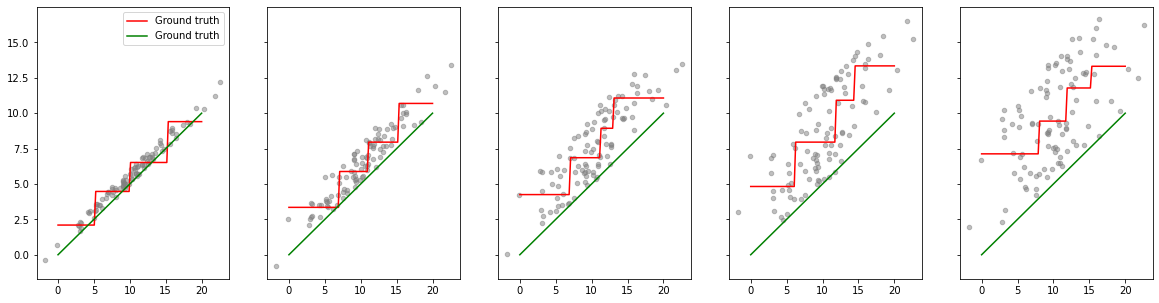

In [11]:
from sklearn.tree import DecisionTreeRegressor,plot_tree
f = lambda x,noise: 0.5 * x + noise*rng.normal(0,1,size=x.shape)
N = 100
perf = [] 

x = rng.normal(10,5,size=(N,1))
x_range = np.linspace(0,20,100).reshape(-1, 1)

fig, ax = plt.subplots(1, 5,sharey=True,sharex=True,figsize=(20,5))
for i,sd in enumerate(np.arange(1,10,2)):
    y = fu(x,sd)
    mdl = DecisionTreeRegressor(max_depth=2).fit(x,y)
    ax[i].scatter(x, y,s=20,c='gray',alpha=0.5);
    ax[i].plot(x_range,mdl.predict(x_range) ,c='r',label='Ground truth');
    ax[i].plot(x_range,np.polyval([0.5,0], x_range) ,c='g',label='Ground truth');
    if i==0:ax[i].legend()
    perf.append(calc_error(y,y_hat,i,f'err={sd}'))
pd.concat(perf) 

## What about non-linear space?

### Let's work with a famous model 
- In this 2D regression example, we will use the Haemodynamic Response Function [(HRF) mixture of gammas](https://www.fil.ion.ucl.ac.uk/~karl/Nonlinear%20event%20related%20responses.pdf) 
as our non-linear regression data generator
- The idea is simple, and you probably covered this in many courses:
    - The canonical haemodynamic response function (HRF)} defines the typical response
     of the neurovascular system (as reflected by the MR signal in a noiseless environment)
     to a brief, intense period of neural stimulation. 
    - With an initial overshoot response followed by a poststimulus undershoot. 
    It is commonly represented as a mixture of gamma probability density functions in the following form: 
- $$H(x) = \frac{l_1^{h_1} x^{h_1 - 1} e^{-l_1 x}}{\Gamma(h_1)}-r\frac{l_2^{h_2} x^{h_2 - 1} e^{-l_2 x}}{\Gamma(h_2)}$$
- where $\Gamma$ is the gamma function with $l, h$ as the scale and shape parameters, respectively, 
and $r$ defines the ratio of response to undershoot. 

### Our hrf function 
- We defined the first peak at 6 seconds and the delay of undershoot has its minima at 16 seconds
- We also defined r as 1/6 

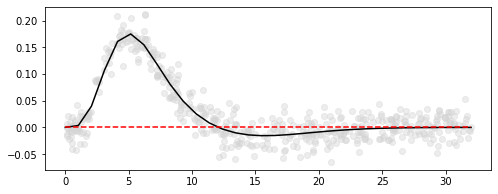

In [12]:
from scipy.stats import gamma
def sample_hrf(X=500,noise_ratio=0):
    if type(X)==int:
        X = np.random.uniform(0,32,X).reshape(-1, 1)                  
    Y =  gamma.pdf(X , 6)-gamma.pdf(X , 16)/6
    n = X.shape[0]
    if noise_ratio:
        Y = Y+np.random.normal(0,noise_ratio,size=(n,1))
    return Y.reshape(-1,),X  
yn,Xn = sample_hrf(noise_ratio=0.02)   
Y,X = sample_hrf(np.linspace(0,32,32))  
fig, ax = plt.subplots(1, 1,figsize=(8,3))
ax.scatter(Xn, yn,c='lightgray',alpha=0.4);
ax.plot(X, Y,c='k');
ax.plot([0,32], [0,0],'--r');  

# How do regression trees work on nonelinear space?
- Regression trees and classification trees work in a similar way 
- They divide the dataspace and create local rules that can be applied to new events 
- How would you describe the HRF textually?
- A simple tree would look like this: 

~~~bash
    |--- if x <= 10
    |   |--- and if x <= 2
    |   |   |--- y = 0
    |   |--- else 
    |   |   |--- y = 0.2
    |--- else >  10
    |   |--- and if x <= 12
    |   |   |--- y: 0.05
    |   |--- else
    |   |   |--- y: -0.01
~~~



# Regression trees overfit 
- Like all instance based modles they are prune to overfitting
- Let's try to visualize the idea of overfitting using the HRF

,Kind,MAE,MSE,MAD,RMSE,r2
0,max_depth=1,0.029474,0.001594,0.020439,0.039919,0.076251
1,max_depth=2,0.022506,0.000876,0.017173,0.029601,0.641239
2,max_depth=3,0.017762,0.000523,0.014549,0.022874,0.812819
3,max_depth=4,0.016403,0.000445,0.013451,0.021100,0.845061
4,max_depth=5,0.015169,0.000387,0.012591,0.019682,0.867838
5,max_depth=6,0.013856,0.000347,0.011015,0.018620,0.883339
6,max_depth=7,0.012803,0.000306,0.009805,0.017504,0.898284
7,max_depth=8,0.011266,0.000257,0.007956,0.016040,0.915954


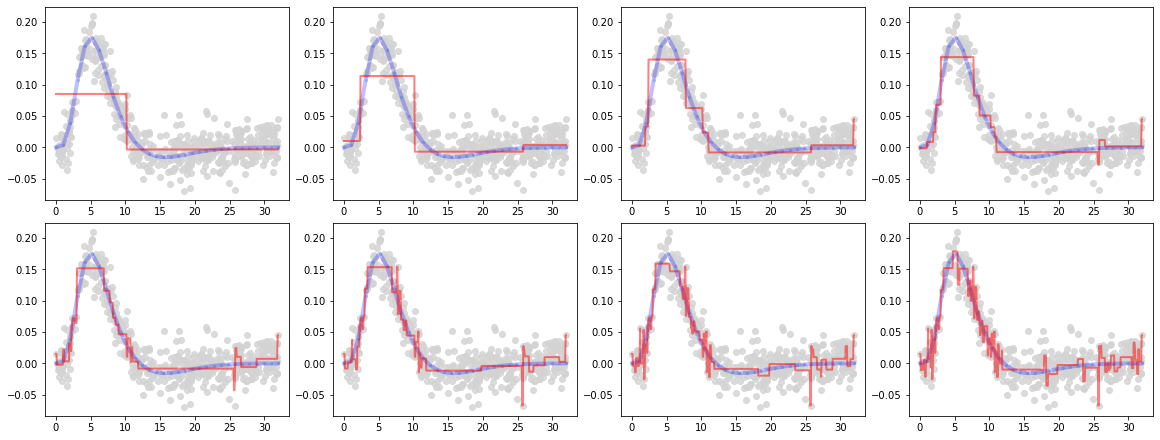

In [139]:
from sklearn.tree import DecisionTreeRegressor,plot_tree
import matplotlib.gridspec as gridspec

fig = plt.figure(constrained_layout=True,figsize=(16,6))
gs = gridspec.GridSpec(ncols=4, nrows=2, figure=fig)
x_plot = np.linspace(0, 32, 500).reshape(-1, 1)
perf = [] 

for ix,degree in enumerate(np.arange(1,9,1)):
    i,j = np.unravel_index(ix, (2,4))
    ax = fig.add_subplot(gs[i,j])
    mdl = DecisionTreeRegressor(max_depth=degree).fit(Xn,yn)  
    y_hat = mdl.predict(x_plot.reshape(-1, 1))
    ax.scatter(Xn, yn,c='lightgrey',alpha=0.8,label='Data');
    ax.scatter(X, Y,alpha=0.2,s=5);  
    ax.plot(X, Y,c='b',linewidth=4,label='Ground Truth',alpha=0.25);
    ax.plot(x_plot.reshape(-1, ), y_hat,c='r',label='Fitted model',linewidth=2,alpha=0.5);
    perf.append(calc_error(mdl.predict(Xn.reshape(-1, 1)),yn,ix,f'max_depth={degree}'))
pd.concat(perf)     

# regression trees are a fast and straightforward way to understand complex relationships 
- We can also visually explore the ruleset of the tree 
- The information in the graph reflects the model's decision space 
- The top node is called the root of the tree 
	- The top value reflects the split rule (in this case a threshold point) As you can see 152 samples are above 9.215 and 348 are below 
	- MSE stands for mean, standard error and is a common way to estimate regression models (however there are many other ways) 
	- Finally, the value represents the predicted value the tree will assign a point 
	- for example, if we take x=6 it will take us in the following path: 
		- left (6<9.8), right (6>2.023),  left (6<7.723), right ( 6>3.25) 
		- our path will end there, and we will be assigned a value of 0.151

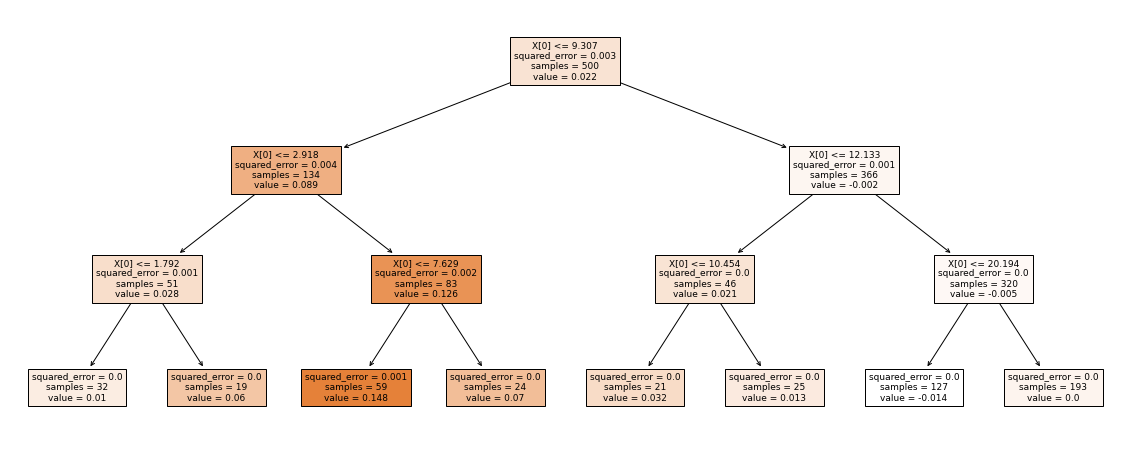

In [53]:
mdl = DecisionTreeRegressor(max_depth=3).fit(Xn,yn)
fig, ax = plt.subplots(1, 1,figsize=(20,8))
plot_tree(mdl, filled=True,max_depth=3,fontsize=9,ax=ax)
plt.show()

### Can we solve non-linear problems with linear models?

- We can a concept called Polynomial expansion to capture non-linear properties 
- As you can see a 9th polynomial is fitted pretty good 


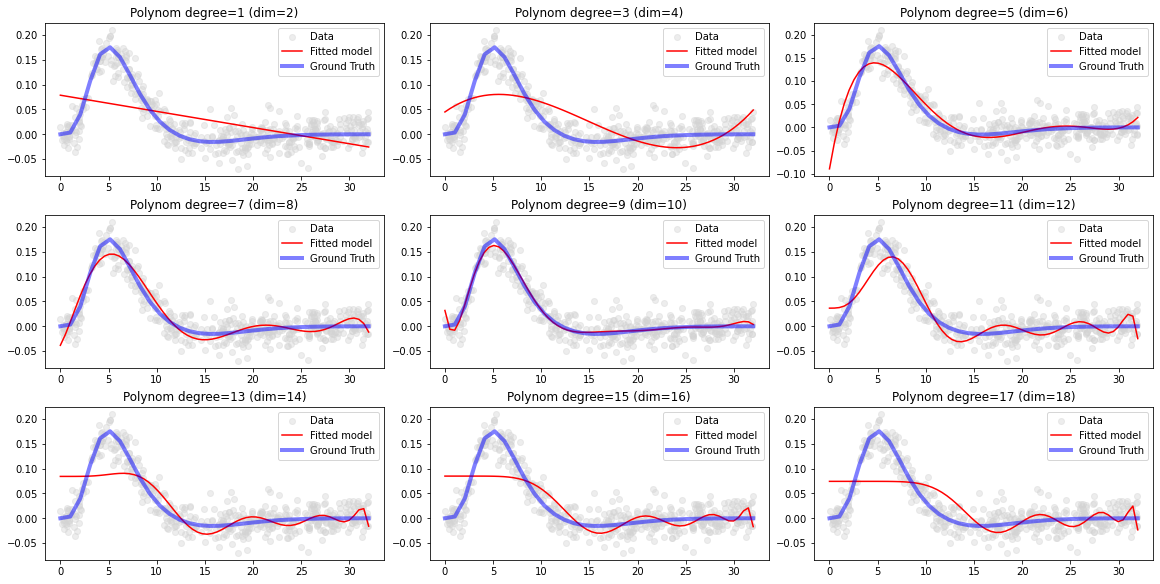

In [144]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.gridspec as gridspec
fig = plt.figure(constrained_layout=True,figsize=(16,8))
gs = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
x_plot = np.linspace(0, 32, 64).reshape(-1, 1)
perf = [] 
for ix,degree in enumerate(np.arange(1,18,2)):
    i,j = np.unravel_index(ix, (3,3))
    ax = fig.add_subplot(gs[i,j])
    pf = PolynomialFeatures(degree)
    xx = pf.fit_transform(Xn)
    mdl = LinearRegression().fit(xx, yn)
    y_hat = mdl.predict(pf.fit_transform(x_plot))
    ax.scatter(Xn, yn,c='lightgray',alpha=0.4,label='Data');
    ax.plot(x_plot, y_hat,c='r',label='Fitted model');
    ax.plot(X, Y,c='b',alpha=0.5,linewidth=4,label='Ground Truth');
    ax.set_title(f"Polynom degree={degree} (dim={xx.shape[1]})")
    ax.legend()
    perf.append(calc_error(mdl.predict(xx),yn,ix,f'max_depth={degree}'))
perf = pd.concat(perf)     

### How do we know what solution to select? 
- Is there a better way of selecting a model 
- Perhaps something like the scree plot idea from last week?


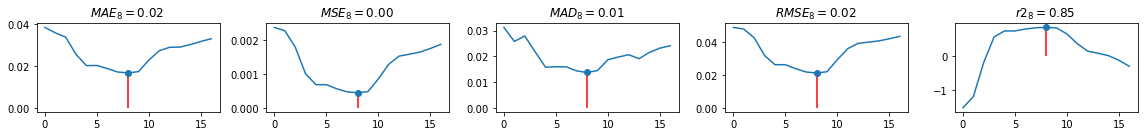

In [165]:
fig,ax = plt.subplots(1,5,figsize=(16,2))

x_plot = np.linspace(0, 32, 64).reshape(-1, 1)
perf = [] 
for ix,degree in enumerate(np.arange(1,18)):
    pf = PolynomialFeatures(degree)
    xx = pf.fit_transform(Xn)
    mdl = LinearRegression().fit(xx, yn)
    y_hat = mdl.predict(xx)
    perf.append(calc_error(y_hat,yn,ix,f'poly_order={degree}'))
perf = pd.concat(perf)
metrics = perf.columns[1:]
for i in range(5):
    ax[i].plot(perf[metrics[i]])
    func = ['argmax','max'] if metrics[i] == 'r2' else ['argmin','min']
    x,y = perf[metrics[i]].agg(func)
    ax[i].stem(x,y,'r*')
    ax[i].set_title(f'${metrics[i]}_{int(x)} = {y:0.2f}$ ')
plt.tight_layout()    

## Last algorithm for today
### the support vector machine 
- To illustrate this point and introduce our final algorithm for today
- Support Vector Machine constructs a hyperplane or list of hyperplanes in high dimensional space, which are then used for classification/regression tasks or other tasks like outlier detection.

### Lets start with what makes SVR different then the models we covered so far 
- SVR tries to fit the best line (or hyperplane for multidimensional datasets) within a threshold value
- In SVR, the best fit line is the hyperplane that has the maximum number of points.
- The constant C is the box constraint, a positive numeric value that controls the penalty imposed on observations that lie outside the epsilon margin (ε) and helps to prevent overfitting (regularization). 
- This value determines the trade-off between the flatness of f(x) and the amount up to which deviations larger than ε are tolerated.
- The threshold value is the distance between the hyperplane and boundary line.
- The boundary is defined using a margin of tolerance epsilon   
- [The math behind support vector regression](https://link.springer.com/article/10.1023/B:STCO.0000035301.49549.88) 



,Kind,MAE,MSE,MAD,RMSE,r2
0,SVR=9,0.009008,0.000123,0.008184,0.011105,0.961326
1,SVR=9,0.016961,0.000450,0.014489,0.021222,0.883310
2,SVR=9,0.024012,0.000928,0.020124,0.030460,0.743802
3,SVR=9,0.031198,0.001521,0.026646,0.039004,0.703034
4,SVR=9,0.040813,0.002594,0.033908,0.050929,0.541551


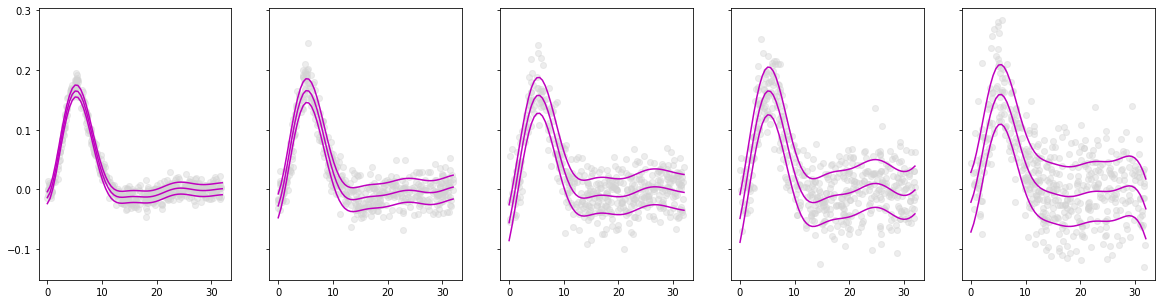

In [232]:
from sklearn.svm import SVR
 
perf = [] 
x_plot = np.linspace(0, 32, 64).reshape(-1, 1)
fig, ax = plt.subplots(1, 5,sharey=True,sharex=True,figsize=(20,5))
for i,noise in enumerate(np.arange(0.01,0.06,0.01)):
    yn,Xn = sample_hrf(noise_ratio=noise)
    ax[i].scatter(Xn, yn,c='lightgray',alpha=0.4,label='Data');   
    mdl = SVR(kernel='rbf',C = 10, epsilon=noise).fit(Xn,yn)
    y_hat = mdl.predict(Xn)
    
    for db in [-mdl.epsilon,0,mdl.epsilon]:
        ax[i].plot(x_plot,mdl.predict(x_plot)+db ,c='m',label=f'SVR{db:02}');
    perf.append(calc_error(yn,y_hat,i,f'SVR={sd}'))
pd.concat(perf) 

## But we are missing a big part of the equation here 
- All of these toy examples looked at optimal solutions where the data was the same 
- This is exactly the definition of data leakage 
- How do we account for that? 
